In [1]:
!pip install opencv-python

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import cv2
from PIL import Image

import multiprocessing
from multiprocessing.pool import ThreadPool

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelBinarizer

# preprocessing image and files
def preProcessImageObsolete(image, cutoff=127, maxContours=5):
    image = np.uint8(image)
    im = np.uint8(image)
    red, thresh = cv2.threshold(im, cutoff, 255, 0)
    im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.uint8(np.ones(im.shape))
    largest_contours = sorted(contours, key=cv2.contourArea)
    for ind, contour in enumerate(largest_contours[maxContours:]):
        mask = cv2.drawContours(mask, [largest_contours[ind]], -1, 0, -1)

    filteredImage = cv2.bitwise_and(thresh, thresh, mask=mask)
    ## plt.imshow(filteredImage)
    return filteredImage


def preprocess(image, cutoff=127, maxContours=5):
    image = np.uint8(image)
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(image, connectivity=4)
    sizes = stats[:, -1]
    max_label = 1
    max_size = sizes[1]
    for i in range(2, nb_components):
        if sizes[i] > max_size:
            max_label = i
            max_size = sizes[i]
    img = np.zeros(output.shape)
    img[output == max_label] = 255
    return img

def preProcessImage(image, cutoff=127, maxContours=10):
    image = np.uint8(image)
    im = np.uint8(image)
    red, thresh = cv2.threshold(im, cutoff, 255, 0)
    im2, contours, hierarchy= cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros(im.shape, np.uint8)
    largest_contours = sorted(contours, key=cv2.contourArea, reverse=True)
    for ind, contour in enumerate(largest_contours[:5]):
        x, y, w, h = cv2.boundingRect(contour)
        mask[y:y+h, x:x+w] = 255
    filteredImage = cv2.bitwise_and(thresh, thresh, mask=mask)
    #plt.imshow(filteredImage)
    #plt.figure()
    #plt.imshow(thresh)
    #plt.figure()
    #plt.imshow(mask)
    return filteredImage.reshape((image.shape))

data = np.load("dataset/train_images.npy",encoding='latin1')

x = []
for image in data:
    image = image[1].reshape(100,100)
    image = preprocess(image)
    x.append(image)

x_pre = []
for image in data:
    image = image[1].reshape(100,100)
    x_pre.append(image)


labels = pd.read_csv("dataset/train_labels.csv")
y = []
for i in range(len(labels)):
    label = labels['Category'][i]
    y.append(label)

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.1, random_state=30)

x_train_backup = x_train
x_validation_backup = x_validation

x_train = np.array(x_train).reshape(len(x_train), 10000).astype('float32') / 255
x_validation = np.array(x_validation).reshape(len(x_validation), 10000).astype('float32') / 255

encoder = LabelBinarizer()

y_train = encoder.fit_transform(y_train)

y_validation = encoder.fit_transform(y_validation)

y_train_decoded = encoder.inverse_transform(y_train)
y_validation_decoded = encoder.inverse_transform(y_train)
# end of preprocessing

Using TensorFlow backend.


Epoch: 1
11.367683202749198
Epoch: 2
9.382560847161962
Epoch: 3
8.641405653622064
Epoch: 4
8.098023139016345
Epoch: 5
7.6067901403404345
Epoch: 6
7.326486296065044
Epoch: 7
7.149688376053312
Epoch: 8
6.949998620766291
Epoch: 9
6.799629095876736
Epoch: 10
6.648676619991193
Epoch: 11
6.506239919601174
Epoch: 12
6.392709797508456
Epoch: 13
6.280889320087324
Epoch: 14
6.189890200201854
Epoch: 15
6.095111605408041
Epoch: 16
6.027192920587905
Epoch: 17
5.9428453144823346
Epoch: 18
5.891252381080036
Epoch: 19
5.81924905917299
Epoch: 20
5.773015304779729
Epoch: 21
5.708595177080926
Epoch: 22
5.665706520885088
Epoch: 23
5.609285103951182
Epoch: 24
5.567596479000132
Epoch: 25
5.51805948321908
Epoch: 26
5.480550551473775
Epoch: 27
5.439399094179964
Epoch: 28
5.406700023578758
Epoch: 29
5.37092657499516
Epoch: 30
5.340050559540706
Epoch: 31
5.3074968575111905
Epoch: 32
5.278412367481717
Epoch: 33
5.249356804841531
Epoch: 34
5.222699131802298
Epoch: 35
5.196001611278746
Epoch: 36
5.170347777027688


Epoch: 285
3.531041029902553
Epoch: 286
3.5293634439409325
Epoch: 287
3.527728066461936
Epoch: 288
3.5261341534217094
Epoch: 289
3.524582693996962
Epoch: 290
3.5230762501499617
Epoch: 291
3.521618682694703
Epoch: 292
3.5202153290221783
Epoch: 293
3.518872119813997
Epoch: 294
3.5175924786769044
Epoch: 295
3.516373996338058
Epoch: 296
3.515208312461248
Epoch: 297
3.5140850197839706
Epoch: 298
3.51299734058765
Epoch: 299
3.5119459841884866
Epoch: 300
3.510938434400634
Epoch: 301
3.5099844504494437
Epoch: 302
3.509091444155227
Epoch: 303
3.508262492010876
Epoch: 304
3.507496700876427
Epoch: 305
3.506789829990442
Epoch: 306
3.5061343457869434
Epoch: 307
3.5055200041416685
Epoch: 308
3.5049354057279434
Epoch: 309
3.504369097145006
Epoch: 310
3.5038093179288996
Epoch: 311
3.5032439695203177
Epoch: 312
3.5026620799031862
Epoch: 313
3.502055038545824
Epoch: 314
3.501415829598776
Epoch: 315
3.5007379752723353
Epoch: 316
3.5000172021638503
Epoch: 317
3.49925359288745
Epoch: 318
3.4984505008818596

No handles with labels found to put in legend.


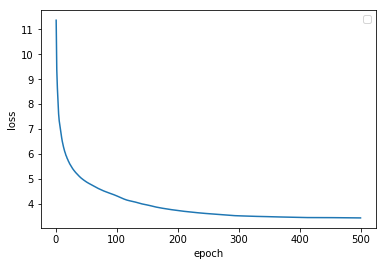

In [ ]:
# Q2 starts here!

# x_train = x_train.reshape((num_examples, 10000))
# y_train = keras.utils.to_categorical(y_train, num_classes)

# activation function and its derivative
def sigmoid(x, deriv=False):
    if deriv:
        return sigmoid(x) * (1 - sigmoid(x))
    return 1 / (1 + np.exp(-x))


def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps/np.sum(exps, axis=1, keepdims=True)


class Layer:
    # initialze layers with weights, biases, cache and deltas arrays
    def __init__(self, num_input, num_output):
        self.weights = np.random.randn(num_input, num_output)
        self.biases = np.zeros((1, num_output))
        self.cache = None
        self.deltas = None
    
    # activation function for all layers except the last
    def activation(self, inputs):
        self.cache = sigmoid(np.dot(inputs, self.weights) + self.biases)
        return self.cache
    # activation function for the output layer
    def activation_last(self, inputs):
        self.cache = softmax(np.dot(inputs, self.weights) + self.biases)
        return self.cache


class NeuralNetwork:

    def __init__(self, x_train, y_train, dimentions, epochs, learning_rate):
        # initialize nn model
        self.x_train = x_train
        self.y_train = y_train
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.losses = []

        self.layers = []
        for i in range(len(dimentions) - 1):
            self.layers.append(Layer(dimentions[i], dimentions[i + 1]))

    # cross entropy function
    def cross_entropy(self, pred):
        return (pred - self.y_train) / self.y_train.shape[0]
    
    # calculate loss
    def loss(self, pred):
        n = self.y_train.shape[0]
        logp = - np.log(pred[np.arange(n), self.y_train.argmax(axis=1)])
        loss = np.sum(logp) / n
        return loss

    # feed forward process
    def forward(self, x):
        # apply sigmoid function to all layers except the last layer
        cache = self.layers[0].activation(x)
        for layer in self.layers[1:-1]:
            cache = layer.activation(cache)
        # apply softmax function as the activation function for the output layer
        cache = self.layers[-1].activation_last(cache)    
        return cache

    # backpropagation process
    def backprop(self, x):
        # compute loss for each epoch
        loss = self.loss(self.layers[-1].cache)
        self.losses.append(loss)
        print(loss)
        # layer deltas are computed using the derivative of the activation function
        # cross entropy function is used here as the derivative of softmax function is cancelled out in chain rule
        self.layers[-1].deltas = self.cross_entropy(self.layers[-1].cache)
        z_delta = np.dot(self.layers[-1].deltas, self.layers[-1].weights.T)
        # z delta of a backward layer is used to compute the deltas of a forward layer
        for layer in self.layers[-2:0:-1]:
            layer.deltas = z_delta * sigmoid(layer.cache, deriv=True)
            z_delta = np.dot(layer.deltas, layer.weights.T)

        self.layers[0].deltas = z_delta * sigmoid(self.layers[0].cache, deriv=True)

        # update weights and biases using gradient descent approach in all layers
        self.layers[0].weights -= self.learning_rate * np.dot(x.T, self.layers[0].deltas)
        self.layers[0].biases -= self.learning_rate * np.sum(self.layers[0].deltas, axis=0)
        cache = self.layers[0].cache

        for layer in self.layers[1:]:
            layer.weights -= self.learning_rate * np.dot(cache.T, layer.deltas)
            layer.biases -= self.learning_rate * np.sum(layer.deltas, axis=0)
            cache = layer.cache

    def predict(self, x):
        return np.apply_along_axis(np.argmax, 1, self.forward(x))

    # fit the model
    def fit(self):
        for i in range(1, self.epochs + 1):
            print("Epoch: {}".format(i))
            self.forward(self.x_train)
            self.backprop(self.x_train)
    
    # plot loss graph
    def plot(self):
        plt.figure()
        plt.xlabel("epoch")
        plt.ylabel("loss")
        plt.plot(range(1, self.epochs + 1), self.losses)
        plt.legend()
        plt.show()



model = NeuralNetwork(x_train, y_train, [10000, 800, 400, 100, 31], 500, 0.1)
model.fit()
model.plot()



# accuracy

# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_raw.astype(int), model.predict(x_train)))
# print(accuracy_score(y_valid_raw.astype(int), model.predict(x_valid)))

In [8]:
# Calculate training and valid set accuracy

y_train = np.apply_along_axis(np.argmax, 1, y_train)
y_validation = np.apply_along_axis(np.argmax, 1, y_validation)
from sklearn.metrics import accuracy_score
print("Train accuracy:")
print(accuracy_score(y_train, model.predict(x_train)))
print("Validation accuracy:")
print(accuracy_score(y_validation, model.predict(x_validation)))

Train accuracy:
0.08644444444444445
Validation accuracy:
0.065
